In [32]:
import pandas as pd
import self as self

data = pd.read_csv('export-token-0x205afd08cefe438377a0abc5a20cb4462e1a8c5c.csv')
print(data.columns)

Index(['Txhash', 'Blockno', 'UnixTimestamp', 'DateTime', 'From', 'To',
       'Quantity', 'Method'],
      dtype='object')


In [33]:
data.size

392

In [86]:
df =data[['From', 'To', 'Quantity']]
df.Quantity= df.Quantity.str.replace(',', "", ).astype(float)
df_groupped =df.groupby(['From', 'To']).sum().reset_index()
df_groupped.head(5)

/var/folders/2c/tpsqdjds6wn2vsc099c22z5w0000gn/T/ipykernel_4761/4266985974.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Quantity= df.Quantity.str.replace(',', "", ).astype(float)


,From,To,Quantity
0,0x14aaee642a3db0f7ae84f74994de9ee20980ff6a,0x124d9bf2fecbc16b54ec4accdb14d44c2144f012,4.690976e+08
1,0x18273dda6fa28eb8a7265762828845cb5c4469c8,0x124d9bf2fecbc16b54ec4accdb14d44c2144f012,2.092827e+09
2,0x1ce7287f50742685a69d0f0b66707247429c1212,0x124d9bf2fecbc16b54ec4accdb14d44c2144f012,2.259092e+09
3,0x26b9a8beb8f15a53e4a7eccfd098e367eff7dbb9,0x124d9bf2fecbc16b54ec4accdb14d44c2144f012,6.579923e+09
4,0x34ac1c12bc09b6f2532800446f404c91bae29d48,0x4982085c9e2f89f2ecb8131eca71afad896e89cb,5.250300e+09


In [7]:
edges = data[['From', 'To', 'Quantity']]
edges['UniqueId'] = edges['From'] + '_' + edges['To']


/var/folders/2c/tpsqdjds6wn2vsc099c22z5w0000gn/T/ipykernel_4761/2345123601.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edges['UniqueId'] = edges['From'] + '_' + edges['To']


In [8]:
class Graph:
    def __init__(self, directed =True):
        self.m_directed =directed
        self.m_list_of_edges = []

    def add_edge(self,id, node1, node2, weight,lo =0, hi =None):
        if len(self.m_list_of_edges) == 0:
            self.m_list_of_edges.append([id, node1, node2, weight])
        else:
            if lo < 0:
                raise ValueError('lo must be non-negative')
            if hi is None:
                hi = len(self.m_list_of_edges)

            while lo < hi:
                mid = (lo+hi)//2
                if id < a[mid]:
                    hi = mid
                else:
                    lo = mid+1
            self.m_list_of_edges.insert(lo, [id, node1, node2, weight])


        self.m_list_of_edges.append([id, node1, node2, weight])

        if not self.m_directed:
            self.m_list_of_edges.append([id, node2, node1, weight])

    def print_graph(self):
        for edge in self.m_list_of_edges:
            print(edge)





array(['0x4982085c9e2f89f2ecb8131eca71afad896e89cb',
       '0x619b4779482ebbf78bab00672ff7c6493f7f5a46',
       '0x3b3dc5d42db91ee379a1d42911564b60c738e3b9',
       '0x971412625c134ee530258e9f7d5df7306e76e25d',
       '0x34ac1c12bc09b6f2532800446f404c91bae29d48',
       '0xcfc1df78e68e47cd2b2abe94fc6af9adb7e4c3ed',
       '0x7947e3194290195aeb32c4fbe0cb4eaea305aa71',
       '0x14aaee642a3db0f7ae84f74994de9ee20980ff6a',
       '0x26b9a8beb8f15a53e4a7eccfd098e367eff7dbb9',
       '0xab4ad0cceab0323e01f9115d2859396cfe33b11e',
       '0x18273dda6fa28eb8a7265762828845cb5c4469c8',
       '0xe6a484bbaa7d6d880b7dda58ae0cc2b50b149cd9',
       '0xb500db9df160204769b79c41a423dc872e41e9de',
       '0x5e5699172f8cd8a3c089f78926b93606733fa8f6',
       '0x1ce7287f50742685a69d0f0b66707247429c1212',
       '0x482a1efc09e4c2eb8d33b850a365c37b6043357f',
       '0x3d24da45253fee775c065d0bb590948817f16819'], dtype=object)

In [18]:
deneme = pd.DataFrame([['a','a','b','b','c'],['b','c','c','c','a'],[1,2,3,4,5]]).T
deneme.columns = ['From', 'To', 'Quantity']
deneme

,From,To,Quantity
0,a,b,1
1,a,c,2
2,b,c,3
3,b,c,4
4,c,a,5


In [38]:
deneme_group = deneme.groupby(['From', 'To']).sum().reset_index()

In [91]:
def show_wgraph():
    plt.figure()
    pos = nx.spring_layout(G)
    weight_labels = nx.get_edge_attributes(G,'weight')
    nx.draw(G,pos,font_color = 'white', node_shape = 's', with_labels = True,)
    output = nx.draw_networkx_edge_labels(G,pos,edge_labels=weight_labels)
    plt.savefig('weighted_graph_4.png',format='svg', dpi=1200)



a
a
b
c


In [63]:
df.loc[(df['From'] == '0x4982085c9e2f89f2ecb8131eca71afad896e89cb') & (df['To'] == '0x1ce7287f50742685a69d0f0b66707247429c1212')]

,From,To,Quantity
30,0x4982085c9e2f89f2ecb8131eca71afad896e89cb,0x1ce7287f50742685a69d0f0b66707247429c1212,"828,470,321.84"
35,0x4982085c9e2f89f2ecb8131eca71afad896e89cb,0x1ce7287f50742685a69d0f0b66707247429c1212,"1,430,621,284.89"


In [59]:
df_groupped

,From,To,Quantity
0,0x14aaee642a3db0f7ae84f74994de9ee20980ff6a,0x124d9bf2fecbc16b54ec4accdb14d44c2144f012,"469,097,590.76"
1,0x18273dda6fa28eb8a7265762828845cb5c4469c8,0x124d9bf2fecbc16b54ec4accdb14d44c2144f012,"2,092,827,107"
2,0x1ce7287f50742685a69d0f0b66707247429c1212,0x124d9bf2fecbc16b54ec4accdb14d44c2144f012,"2,259,091,606.73"
3,0x26b9a8beb8f15a53e4a7eccfd098e367eff7dbb9,0x124d9bf2fecbc16b54ec4accdb14d44c2144f012,"6,579,922,598.99"
4,0x34ac1c12bc09b6f2532800446f404c91bae29d48,0x4982085c9e2f89f2ecb8131eca71afad896e89cb,"5,250,300,280"
5,0x3b3dc5d42db91ee379a1d42911564b60c738e3b9,0xa3ac0659fe5286c30bfb52caabe2ea332a1354d3,"11,109,460"
6,0x3d24da45253fee775c065d0bb590948817f16819,0x124d9bf2fecbc16b54ec4accdb14d44c2144f012,"40,000,000,000"
7,0x482a1efc09e4c2eb8d33b850a365c37b6043357f,0x75987b9edb5463ce1a3a857e11671424600927a4,"232,327,873.36"
8,0x4982085c9e2f89f2ecb8131eca71afad896e89cb,0x14aaee642a3db0f7ae84f74994de9ee20980ff6a,"469,097,590.76"
9,0x4982085c9e2f89f2ecb8131eca71afad896e89cb,0x18273dda6fa28eb8a7265762828845cb5c4469c8,"2,092,827,107"


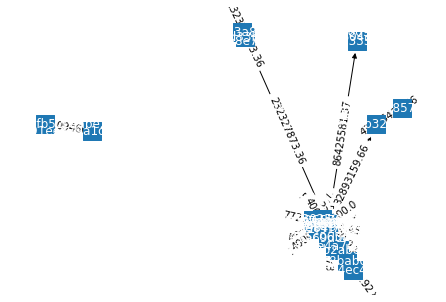

In [92]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.DiGraph()

for i in df_groupped.loc[:,['From', 'To', 'Quantity']].values:
    G.add_edge(i[0], i[1], weight = i[2])


show_wgraph()


In [93]:
df_groupped.to_csv('weightedgraph.csv', index=False)